In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Ejercicio: La temperatura promedio de una máquina es de 37°C, con una desviación estándar medida de 1.5 ºC. Suponiendo que la distribución de la temperatura puede ser _aproximada_ por una normal, ¿qué tan probable es encontrar una temperatura de 35 o menos?

$$
p(x \leq 35)
$$

In [2]:
mean = 37
std = 1.5
# x = np.linspace(-273, 37, 1000)
x = 35
norm.cdf(x,mean,std)

0.09121121972586788

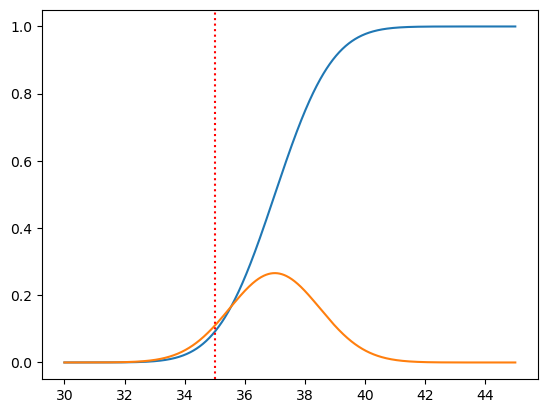

In [3]:
rx = np.linspace(30, 45, 1000)
cum_fun = norm.cdf(rx,mean,std)
plt.plot(rx, cum_fun);
den_fun = norm.pdf(rx,mean,std);
plt.plot(rx, den_fun)
plt.axvline(35, ls=':',c='r') #linestyle, color

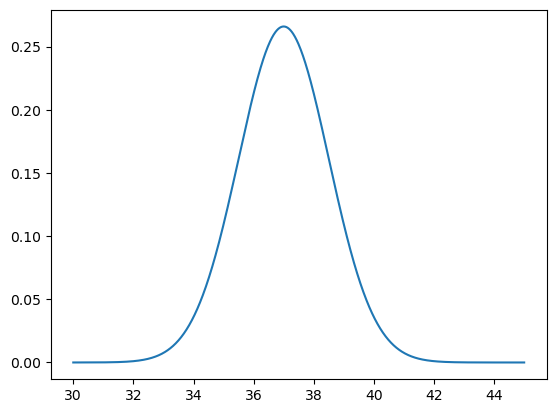

In [4]:
rx = np.linspace(30, 45, 1000)
den_fun = norm.pdf(rx,mean,std);
plt.plot(rx, den_fun)

$$
f(x) = x^2
$$

obtener

$$
F(x) = \int_0^2 f(x)dx
$$

In [5]:
# integracion numerica
from scipy.integrate import quad

# definir f(x)

def f(x):
    return x**2

quad(f,a=0, b=2)


(2.666666666666667, 2.960594732333751e-14)

In [6]:
mean = 37
std = 1.5
# x = np.linspace(-273, 37, 1000)
x = 35
norm.cdf(x,mean,std)

0.09121121972586788

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

In [7]:
# definamos nuestra propia funcion normal

def normal(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))
# 
quad(normal, -np.inf, 35, args=(37, 1.5)) # same as norm.cdf(35, 37, 1.5)

(0.0912112197258679, 1.428527094724896e-11)

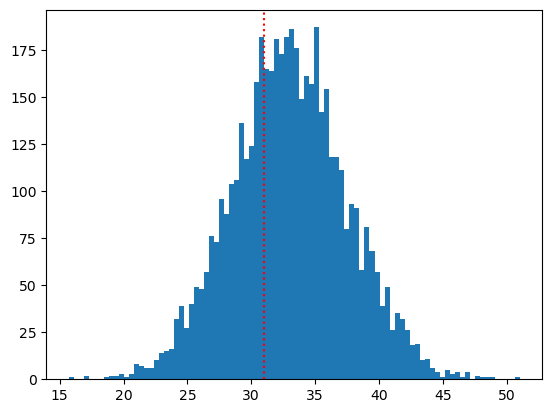

In [8]:
# ejemplo, azucar de agave, media=33, sd=4.5 parametros poblacionales
random_normal_var = norm.rvs(33, 4.5, 5000)
plt.hist(random_normal_var, bins=90);
plt.axvline(31, c='red', ls=':')

In [9]:
media = 22
# que tan probable es obtener una media de 31 si proviene de una poblacion con media=33 y sd=4.5?
quad(normal, -np.inf, media, args=(33, 4.5))

(0.007253771124867805, 2.0168614789731595e-11)

In [10]:
norm.cdf(22,33,4.5)

0.007253771124867817

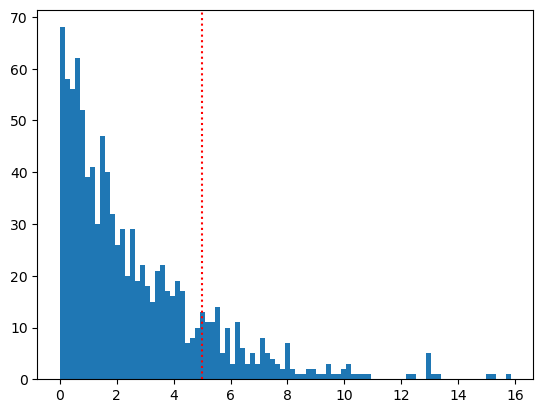

In [11]:
from scipy.stats import expon
rvs_expon = expon.rvs(scale=2.5, size=1000)
plt.hist(rvs_expon,bins=90);
plt.axvline(5,ls=':', c='r')

In [12]:
x=5
expon.cdf(5, 2.5)

0.9179150013761012

In [13]:
# cual es la probabilidad de x despues de 5 horas
1-expon.cdf(5, 2.5)

0.08208499862389884

In [14]:
# cual es la probabilidad de x entre 3 y 7 horas?
expon.cdf(7, 2.5) - expon.cdf(3, 2.5)

0.5954216631743912

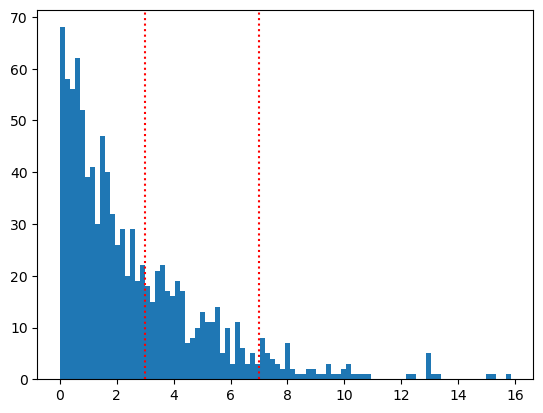

In [15]:
plt.hist(rvs_expon,bins=90);
plt.axvline(3,ls=':', c='r')
plt.axvline(7,ls=':', c='r')

In [16]:
1-expon.cdf(7, 2.5)

0.011108996538242266

scale: tamaño del intervalo (rango), limite superior - limite inferior

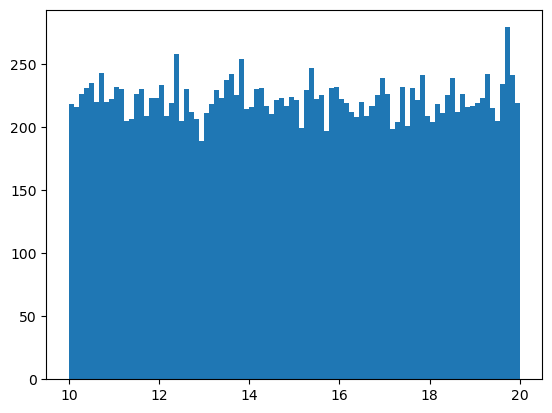

In [17]:
from scipy.stats import uniform
rvs_unif = uniform.rvs(10, 10, 20000)
plt.hist(rvs_unif, bins=90);

In [18]:
# cual seria la probabilida de x <= 14?
uniform.cdf(11.1, 10, 10)

0.10999999999999996

In [19]:
1/10

0.1

Ejemplo 1:

La distribución uniforme tiene dos parámetros, $a$ y $b$ que representan los límites inferior y superior de la distribución. 

$$
p(x) = \frac{1}{b-a}\quad \text{ si $x$ está en } [a,b]
$$

Supongamos que la duración de una llamada telefónica en minutos sigue una distribución uniforme entre 0 y 20 minutos. ¿Cuál es la probabilidad de que la llamada dure más de 15 minutos?

Ejemplo 2:

La distribución exponencial se puede parametrizar de dos maneras:

$$
f(x) = \lambda e^{-\lambda x}
$$

$$
f(x) = \frac{1}{\beta}e^{-\frac{1}{\beta}x}
$$

En donde $\lambda$ es la tasa, y $\beta$ es la escala. $\beta=1/\lambda$

Supongamos que el tiempo entre llegadas de autobuses en una estación es en promedio de 10 minutos. ¿Cuál es la probabilidad de que el próximo camión llegue en 15 minutos o menos?

Simular también 3000 valores de una distribución exponencial con el parámetro dado, y graficar el histograma junto con el valor de la pregunta (15 minutos).

```python
from scipy.stats import expon

expon(..., scale=10)
```

Ejemplo 3:

El tiempo promedio de una máquina para fallar es de 1200 horas. ¿Cuál es la probabilidad de que falle antes de 1500 horas? Simular 3000 valores, graficar e indicar en dónde se encuentra el valor x.

Ejemplo 4:

El peso de las manzanas en una granjka sigue una distribución normal con un promedio de 200g y una desviación estándar de 50g. ¿Cuál es la probabilidad de que una manzana pese más de 250g? Simular, graficar e indicar el valor.

Ejmplo 5: 

La altura de los estudiantes de una universidad se distribuye normalmente con un promedio de 170 cm y una desviación estándar de 10cm. ¿Qué porcentaje de estudiantes mide entre 160 cm y 180 cm? Simular, graficar e indicar los valores.

Ejemplo 6 (exponencial):

Suponer que estamos interesados en analizar una taquilla de cine con un solo empleado vendiendo entradas. Las llegadas de los clientes a la taquilla siguen un proceso de Poisson con una tasa de llegada de $\lambda=10$ clientes por hora. El tiempo que toma al empleado vender una entrada sigue una distribución exponencial con una tasa de servicio de $\lambda_2=12$ clientes por hora. 

Simular las llegadas y los tiempos de servicio para 100 clientes, calcular el tiempo de espera en la cola para cada cliente. 

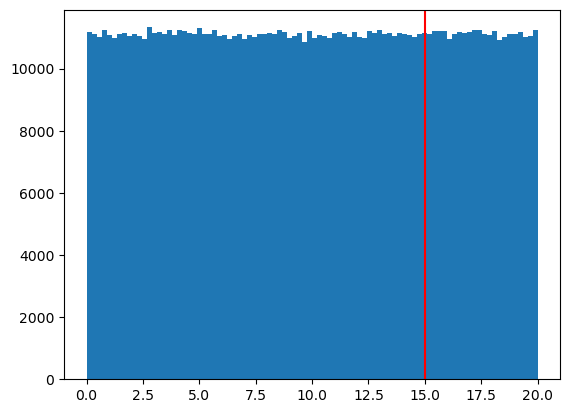

In [28]:
from scipy.stats import uniform

a=0
b=20

unif_rvs = uniform.rvs(a, b, 1000000)

plt.hist(unif_rvs,bins=90);
plt.axvline(15,c='red')

In [24]:
1-uniform.cdf(15,a,b)

0.25

In [27]:
1/20*5

0.25

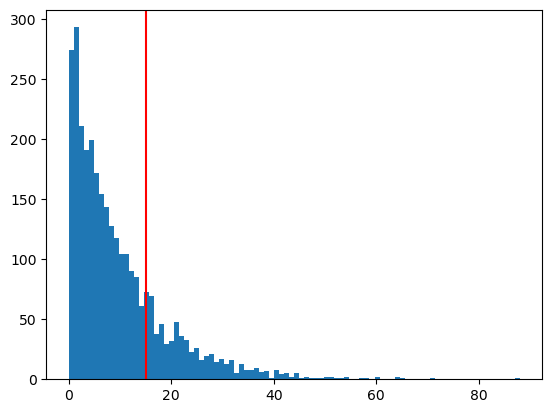

In [32]:
scale = 15
expon_rvs = expon.rvs(scale=10,size=3000)
plt.hist(expon_rvs,bins=90);
plt.axvline(scale,color='red')

In [43]:
expon.cdf(15,scale=10)

0.7768698398515702

In [44]:
quad(expon.pdf, 0, 15, args=(0,10))

(0.7768698398515701, 8.624987833400712e-15)

In [39]:
help(expon.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.expon_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



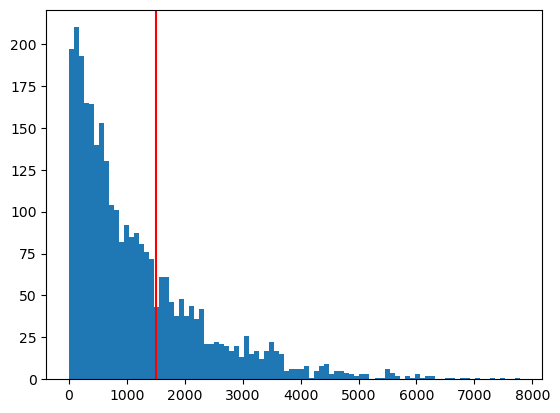

In [46]:
scale = 1200
x=1500
expon_rvs = expon.rvs(loc=0, scale=scale,size=3000)
plt.hist(expon_rvs,bins=90);
plt.axvline(x,color='red')

In [47]:
expon.cdf(x,scale=scale)

0.7134952031398099

In [48]:
quad(expon.pdf, 0, x, args=(0,scale))

(0.7134952031398099, 7.921388024854202e-15)

In [51]:
def exponential(x,lam):
    return lam*np.exp(-lam*x)

quad(exponential, 0, x, args=(1/scale))

(0.7134952031398099, 7.921388024854202e-15)

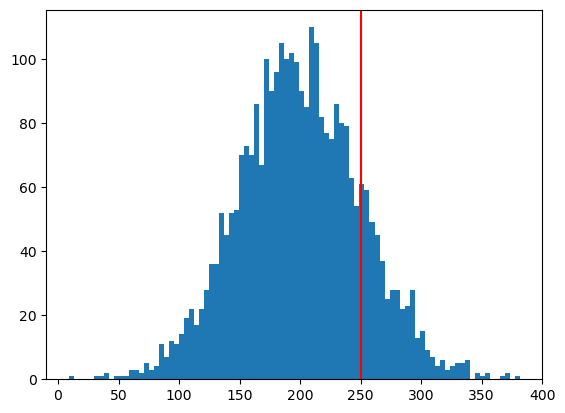

In [52]:
mu, sigma = 200, 50

rvs_norm = norm.rvs(loc=mu, scale=sigma, size=3000)
plt.hist(rvs_norm,bins=90);
plt.axvline(250,c='red')

In [53]:
1 - norm.cdf(250,200,50)

0.15865525393145707

In [55]:
quad(norm.pdf, 250, 400, args=(200, 50))

(0.15862358268962398, 1.7610755375055295e-15)

In [56]:
norm.cdf(180, 170, 10) - norm.cdf(160,170,10)

0.6826894921370859

In [57]:
quad(norm.pdf, 160, 180, args=(170, 10))

(0.6826894921370861, 7.579375928402477e-15)

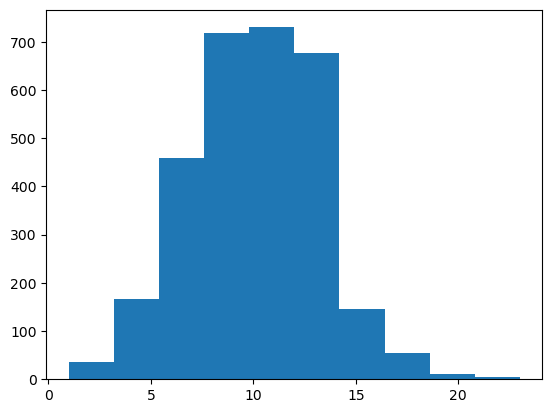

In [64]:
from scipy.stats import poisson

rvs_pois = poisson.rvs(mu=10, size=3000)
plt.hist(rvs_pois);

In [65]:
rvs_pois[0:9]

array([10, 13, 10, 10, 10, 13, 11,  9,  6])